In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
df_train = pd.read_csv('kMeans-data/data/fashion-mnist_small_train.csv')
df_test = pd.read_csv('kMeans-data/data/fashion-mnist_small_test.csv')

In [3]:
df_train.shape

(9000, 785)

In [4]:
df_test.shape

(10000, 784)

In [5]:
df_train.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,116,120,0,0,0
1,6,0,0,0,0,0,0,0,0,0,...,96,67,0,0,1,0,0,0,0,0


In [6]:
X_train = df_train.drop(['label'], axis=1).values
y_train = df_train[['label']].values.ravel()

In [7]:
X_test = df_test.values

<font color=red> provide a understandable name for label </font>

In [8]:
label_dict = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

<font color=red> Plot images of data </font>

In [9]:
def plot_image(vector_input):
    size = 28
    image = vector_input.reshape(size,size) # 784 -> 28 x 28
    plt.figure(figsize=(2,2))
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.axis("off")
    plt.show()

This image is Sandal


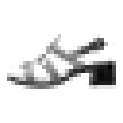

In [10]:
i=10
print('This image is %s' % label_dict[y_train[i]])
plot_image(X_train[i])

This image is Ankle boot


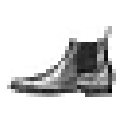

In [11]:
i=100
print('This image is %s' % label_dict[y_train[i]])
plot_image(X_train[i])

<font color=red> KMeans </font>

In [12]:
from sklearn.cluster import KMeans
mykmeans = KMeans(n_clusters=10, random_state=123) 
# random_state will control the initialization of the cluster centers
mykmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

<font color=red> Get cluster IDs </font>

In [13]:
cluster_ids = mykmeans.labels_

<font color=red> Check cluster label for first 10 samples </font>

In [14]:
# provides the cluster ids for each sample in X_train
cluster_ids[:10]

array([4, 3, 7, 2, 4, 3, 4, 7, 0, 7], dtype=int32)

<font color=red> Check if samples in the same cluster have the same label </font>

This image is Shirt


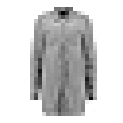

In [15]:
i=1
print("This image is %s" % label_dict[y_train[i]])
plot_image(X_train[i]) #cluster 3

This image is Pullover


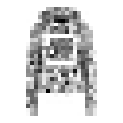

In [16]:
i=5
print("This image is %s" % label_dict[y_train[i]])
plot_image(X_train[i]) # cluster 3

This image is Trouser


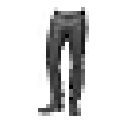

In [17]:
i=2
print("This image is %s" % label_dict[y_train[i]])
plot_image(X_train[i]) # cluster 7

This image is Trouser


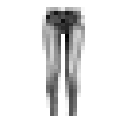

In [18]:
i=7
print("This image is %s" % label_dict[y_train[i]])
plot_image(X_train[i]) # cluster 7

This image is Dress


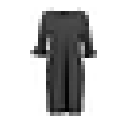

In [19]:
i=9
print("This image is %s" % label_dict[y_train[i]])
plot_image(X_train[i]) # cluster 7

In [20]:
# kMeans model not robust, sometimes does not cluster correctly, more for preprocessing data

<font color=green>Use k-NN to predict test labels </font>

In [21]:
from sklearn.neighbors import KNeighborsClassifier
#n_neighbors = k value
myKNN = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
myKNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [22]:
y_test = pd.read_csv('kMeans-data/data/fashion-mnist_small_test-labels.csv').values

In [23]:
from sklearn.metrics import accuracy_score
y_pred = myKNN.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.8202
